<a href="https://colab.research.google.com/github/farzin23i/PyML-SpringSchool2021/blob/main/Workshop2/PMLSC22_210429.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machines <br>
https://scikit-learn.org/stable/modules/svm.html#regression

In [ ]:
import numpy as np
import pandas as pd
import pylab as plt 
import seaborn as sns

what if there be more complex functionalities of features, than linear: 
$$h_\theta (x) = \theta_0 + \theta_1x $$
$$h_\theta (x) = \theta_0 + \theta_1x + \theta_2x^2 $$
$$h_\theta (x) = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + ...$$

or even more complex, in multi-features problems. The hypothesis is like this:
$$h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1 x_2 + \theta_4 x_1^2 x_2 + ...$$
<br>


# Non-linear Regression

In [ ]:
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

lm = LinearRegression()
lm.fit (X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

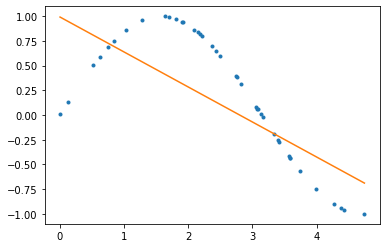

In [ ]:

plt.plot (X, y, '.')
plt.plot (X, lm.predict(X))

In [ ]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

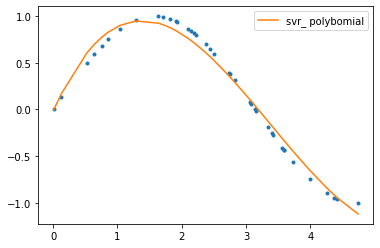

In [ ]:
svr_poly = SVR(kernel='poly', degree=3, coef0=1)
svr_lin = SVR(kernel='linear', gamma='auto')
plt.plot (X, y, '.')

# plt.plot (X, lm.coef_*X+lm.intercept_)
# plt.plot (X, lm.predict(X), label= 'linear regression')
# plt.plot (X, svr_lin.fit (X, y).predict(X), label= 'svr_ linear')
plt.plot (X, svr_poly.fit (X, y).predict(X), label= 'svr_ polybomial')

plt.legend()

page 68, EfficientLearningMachines, 

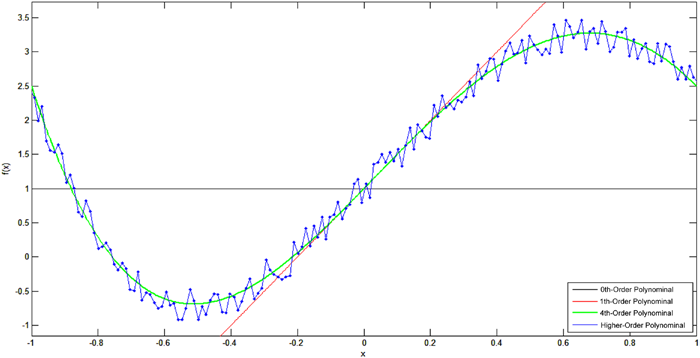

## Multi-feature Regression

In [ ]:
df = pd.read_csv ('/content/sample_data/california_housing_train.csv')
df_test = pd.read_csv ('/content/sample_data/california_housing_test.csv')

df.head ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
X_train = df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]
X_test = df_test[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]


y_train = df['median_house_value']
y_test = df_test['median_house_value']

In [ ]:
lm = LinearRegression()
lm.fit (X_train, y_train).score (X_test, y_test)

0.5458835346746116

In [ ]:
L= df['total_rooms'].values [:10]
L

array([5612., 7650.,  720., 1501., 1454., 1387., 2907.,  812., 4789.,
       1497.])

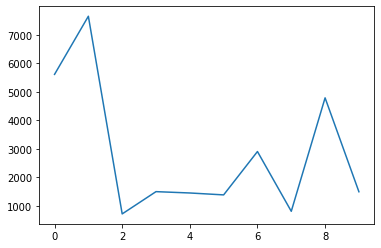

In [ ]:
plt.plot (L)

In [ ]:
mn = min (L)
mx = max (L - mn)

print (mn, mx)

720.0 6930.0


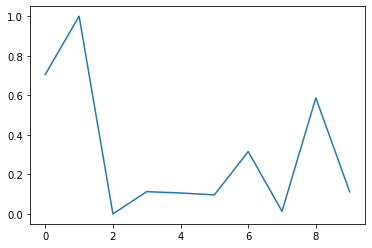

In [ ]:
plt.plot ((L - mn) / mx)

### Firstly, Scale data

<center><img src='https://drive.google.com/uc?id=1BS0eUfTmAmmL0JK19iBFzvhJwMN0cN7x' height=400/></center>

using sklearn:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler ()

df[df.columns] = scaler.fit_transform(df)
df_test[df_test.columns] = scaler.transform(df_test)

df.head ()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,0.107012
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,0.134228
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,0.145775
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,0.120414
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,0.104125


### Then, Fit the Model

In [ ]:
X_train = df[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]
X_test = df_test[['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',]]


y_train = df['median_house_value']
y_test = df_test['median_house_value']

In [ ]:
# Fit regression model
# svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)
svr_poly = SVR(kernel='poly', degree=3, epsilon=.1, coef0=1)

In [ ]:
svr_poly.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
svr_poly.score (X_test, y_test)

0.6186125664867275

# Logistice Regression

Sigmoid Function as an activation:
$$ h_\theta (x) = \frac{1}{1 +e ^ {-\theta x}} $$

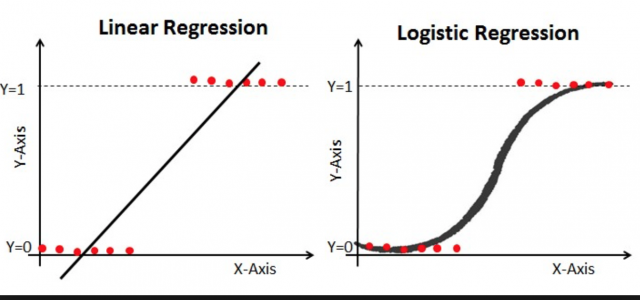

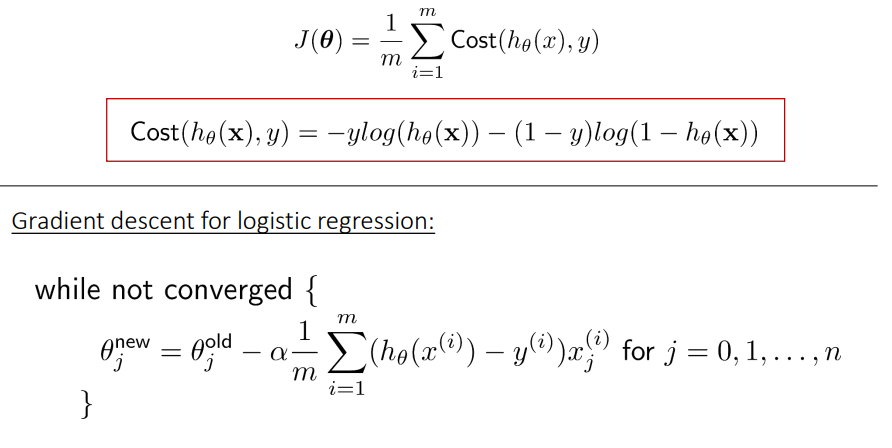

Now let's have a view of SVM <br>
https://scikit-learn.org/stable/modules/svm.html#regression


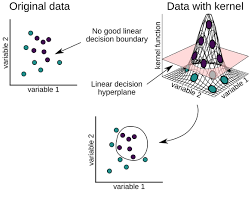

# In complexity, there can be always the issue of OVERFITTING!

From Coursera, Machine Learning :

<center><img src='https://drive.google.com/uc?id=1127tlUNGWu2csDQjUPfdtsDZlw0TZEKT' height=400/></center>

<center><img src='https://drive.google.com/uc?id=1U_3zmasf-7wrev-e_OhSGtWOkgjpBzNO' height=400/></center>